# Hierarchical clustering

**Data Set Information:**

The dataset comprises kernels belonging to three different varieties of wheat: *Kama*, *Rosa* and *Canadian*, 70 elements each, randomly selected for the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. The data set can be used for the tasks of classification and cluster analysis.


**Attribute Information:**

Seven different geometric parameters of wheat kernels were measured:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.


In [139]:
seeds = pd.read_csv("seeds.csv", header = None)
seeds.columns = ['Area', 'Perimeter', 'Compactness', 'Kernel length', 'Kernel width', 'Assymetry coefficient', 'Kernel groove length', 'Label']
seeds['Label'] = seeds['Label'].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
seeds.head()

,Area,Perimeter,Compactness,Kernel length,Kernel width,Assymetry coefficient,Kernel groove length,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [140]:
#extract data and labels
samples = seeds.iloc[:, :-1].values
varieties = seeds.iloc[:, -1].values

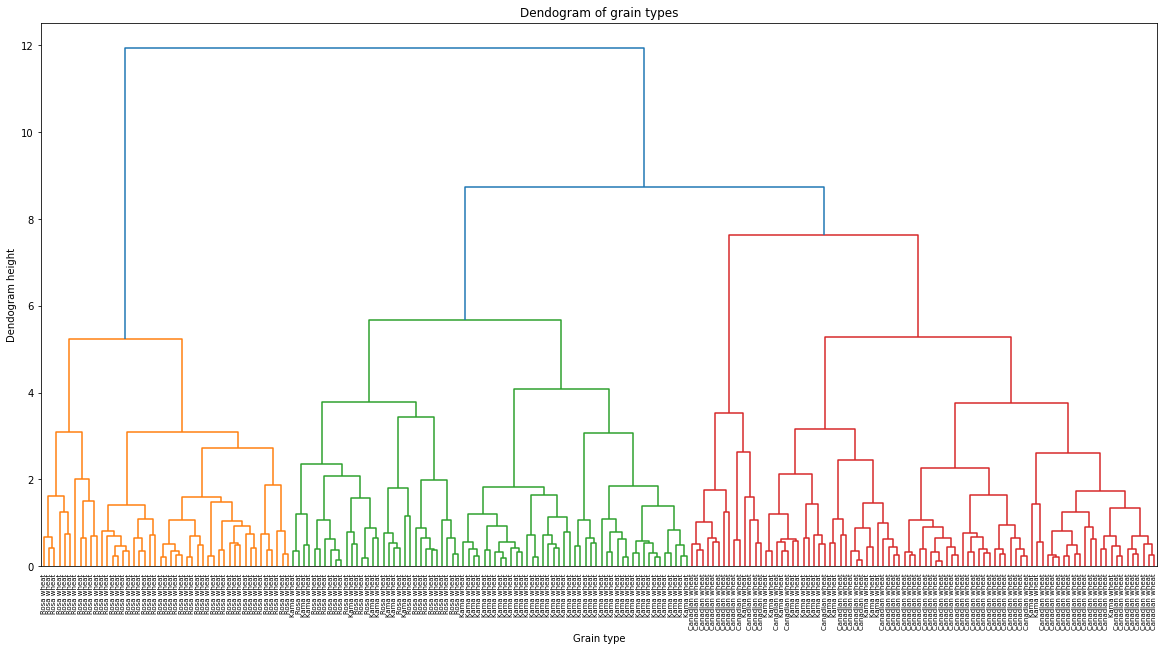

In [141]:
mergings = linkage(samples, method = 'complete')

plt.figure(figsize=(20, 10))

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=7,
)
plt.title('Dendogram of grain types')
plt.xlabel('Grain type')
plt.ylabel('Dendogram height')
plt.show()

Text(0, 0.5, 'Kernel width')

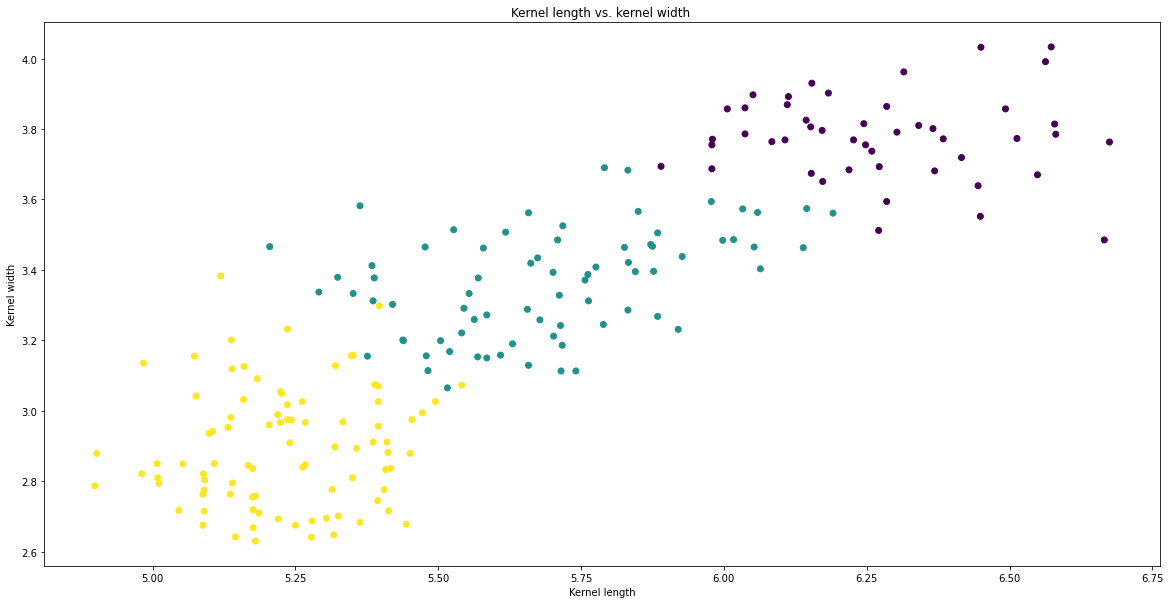

In [142]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 8, criterion='distance')
plt.figure(figsize=(20, 10))
plt.scatter(samples[:, 3],samples[:,4],c=labels)
plt.title('Kernel length vs. kernel width ')
plt.xlabel('Kernel length')
plt.ylabel('Kernel width')